In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn')

In [2]:
df_x=pd.read_csv("Logistic_X_Train.csv")
df_y=pd.read_csv("Logistic_Y_Train.csv")

In [3]:
df_x.head()

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603


In [4]:
df_y.head()

,label
0,1
1,1
2,1
3,0
4,0


In [5]:
Xtrain=[]
Xtrain.append(df_x['f1'])
Xtrain.append(df_x['f2'])
Xtrain.append(df_x['f3'])

In [6]:
Ytrain=df_y['label']
np.array(Ytrain)

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [7]:
Xtrain=np.array(Xtrain)
Xtrain=np.matrix.transpose(Xtrain)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026CF149E128>,
      dtype=object)

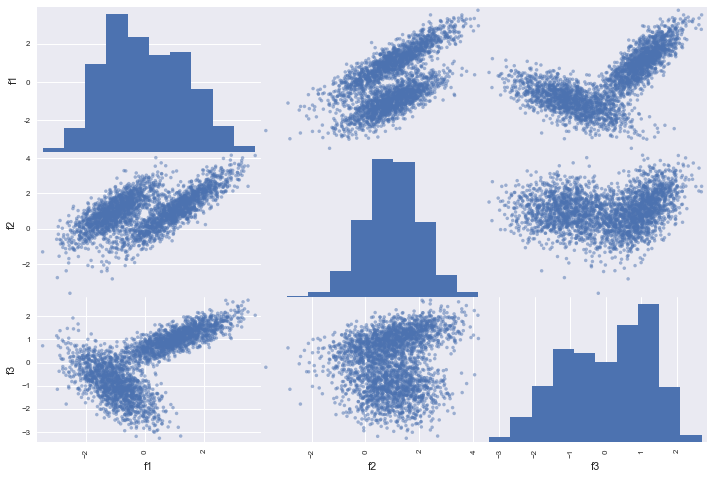

In [8]:
 from pandas.plotting import scatter_matrix
 attributes = ['f1','f2','f3']
 scatter_matrix(df_x[attributes], figsize = (12,8))

In [9]:
def hypothesis(x,theta):
    hx=theta[0]
    for i in range(0,3):
        hx+=x[i]*theta[i+1]
    return sigmoid(hx)


def sigmoid(h):
    return 1.0/(1.0 + np.exp(-1.0*h))


def error(x,y,theta):
    err=0
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],theta)
        err+=np.log2(hx)*y[i]+np.log2(1-hx)*(1-y[i])
    return err


def get_grad(x,y,theta):
    grad=np.zeros((4,))
    for i in range(0,x.shape[0]):
        hx=hypothesis(x[i],theta)
        grad[0]+=y[i]-hx
        for j in range(0,3):
            grad[j+1]+=(y[i]-hx)*x[i][j]
    return grad


def predict(x,theta):
    p=hypothesis(x,theta)
    if p>0.5:
        return 1
    else:
        return 0
    
    
def get_acc(x,y,theta):
    pred=[]
    for i in range(0,x.shape[0]):
        p=predict(x[i],theta)
        pred.append(p)
    pred=np.array(pred)
    return float((pred==y).sum())/y.shape[0]


def gradientAscent(x,y,learningRate=0.001):
    loss=[]
    accuracy=[]
    theta=np.zeros((4,),dtype='float')
    for i in range(0,1000):
        err=error(x,y,theta)
        loss.append(err)
        accuracy.append(get_acc(x,y,theta))
        grad=get_grad(x,y,theta)
        for j in range(0,4):
            theta[j]+=learningRate*grad[j]
    return loss,theta,accuracy


def result(x,theta):
    resu=[]
    for i in range(0,x.shape[0]):
        resu.append(predict(x[i],theta))
    return resu

In [ ]:
loss,final_theta,accuracy=gradientAscent(Xtrain,Ytrain)
print(final_theta)

In [ ]:
df=pd.read_csv("Logistic_X_Test.csv")
Xtest=[]
Xtest.append(df['f1'])
Xtest.append(df['f2'])
Xtest.append(df['f3'])
Xtest=np.array(Xtest)
Xtest=np.matrix.transpose(Xtest)

In [ ]:
Ytest=result(Xtest,final_theta)
print(Ytest)

In [ ]:
plt.plot(accuracy)
plt.show()

In [ ]:
plt.plot(loss)
plt.show()

In [ ]:
plt.scatter(np.matrix.transpose(Xtest)[0],np.matrix.transpose(Xtest)[1])
y = -(final_theta[0]*Xtest+ final_theta[0])/final_theta[2]
plt.plot(Xtest,y,color='Red')
plt.show()